In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
# from sklearn.preprocessing import 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split


In [2]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
from sklearn.exceptions import ConvergenceWarning

# Suppress only the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [3]:
# df=pd.read_csv('jobs_dataset_with_features.csv')


In [4]:
# df.info()

In [5]:
# df['Role'].count()

In [6]:
# df['Role'].unique()


In [7]:
df_cleaned=pd.read_csv('clean_resume_data.csv')
df_cleaned

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...
...,...,...,...
2479,99416532,AVIATION,rank sgt e non commissioned officer charge bri...
2480,24589765,AVIATION,government relations communications organizati...
2481,31605080,AVIATION,geek squad agent professional profile support ...
2482,21190805,AVIATION,program director office manager summary highly...


In [8]:
df_cleaned['Category'].unique()


array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [9]:
df_cleaned['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

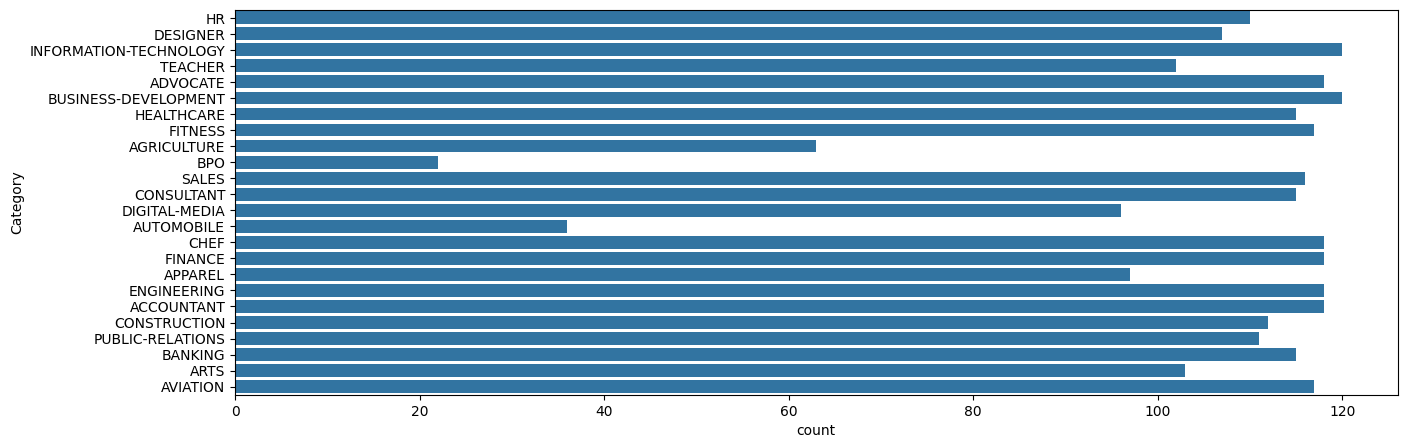

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(df_cleaned['Category'])
plt.show()

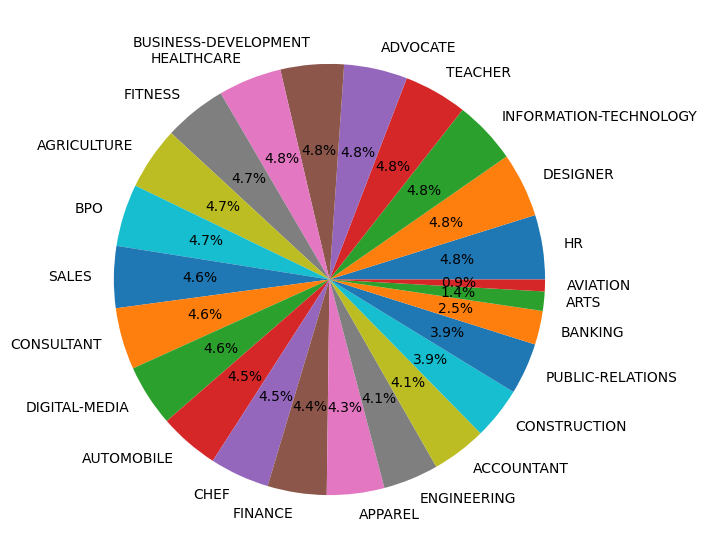

In [11]:
counts=df_cleaned['Category'].value_counts()
label=df_cleaned['Category'].unique()
plt.figure(figsize=(15,7))
plt.pie(counts,labels=label,autopct='%1.1f%%')
plt.show()

In [12]:
df_cleaned.isnull().sum().sort_values(ascending=False)

Feature     1
ID          0
Category    0
dtype: int64

In [13]:
df_cleaned.dropna(inplace=True)

In [14]:
df_cleaned.isnull().sum().sort_values(ascending=False)


ID          0
Category    0
Feature     0
dtype: int64

In [15]:
# creating dummy data
from sklearn.utils import resample

# Define the maximum count among all categories
max_count = df_cleaned['Category'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in df_cleaned['Category'].unique():
    category_data = df_cleaned[df_cleaned['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
df = pd.concat(balanced_data)

In [16]:
df.dropna(inplace=True)


In [17]:
df['Category'].value_counts()


Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

In [18]:
df.shape

(2880, 3)

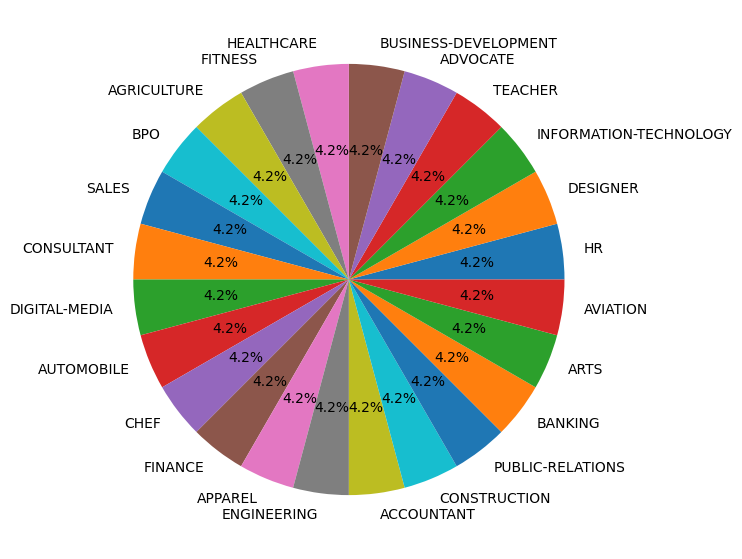

In [19]:
counts=df['Category'].value_counts()
label=df['Category'].unique()
plt.figure(figsize=(15,7))
plt.pie(counts,labels=label,autopct='%1.1f%%')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2880 entries, 102 to 2475
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2880 non-null   int64 
 1   Category  2880 non-null   object
 2   Feature   2880 non-null   object
dtypes: int64(1), object(2)
memory usage: 90.0+ KB


In [21]:
X = df['Feature']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Accuracy: 0.8506944444444444
                        precision    recall  f1-score   support

            ACCOUNTANT       0.70      0.95      0.81        20
              ADVOCATE       0.85      0.76      0.80        29
           AGRICULTURE       0.95      0.91      0.93        23
               APPAREL       0.76      0.73      0.74        22
                  ARTS       0.95      0.75      0.84        24
            AUTOMOBILE       1.00      0.68      0.81        19
              AVIATION       0.97      1.00      0.98        28
               BANKING       0.81      0.59      0.68        22
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.65      0.83      0.73        18
                  CHEF       0.87      0.96      0.92        28
          CONSTRUCTION       0.92      0.92      0.92        25
            CONSULTANT       0.96      0.84      0.90        31
              DESIGNER       0.84      0.93      0.88        28
         D

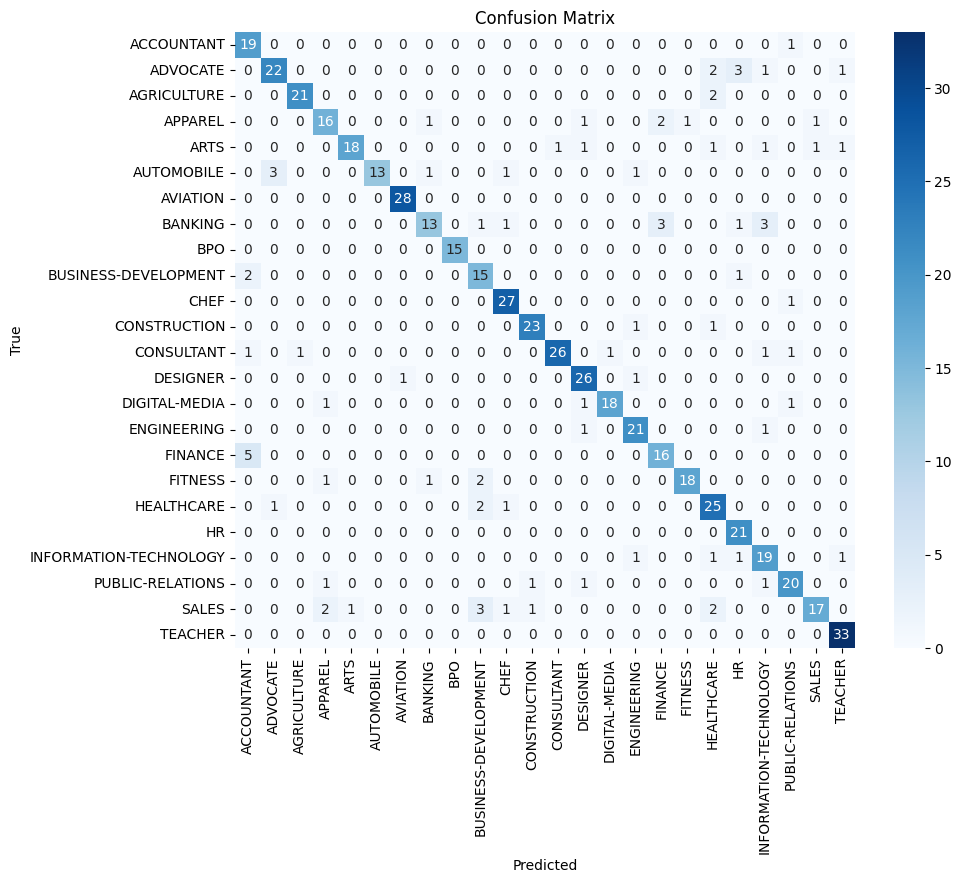

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier





rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Step 4: Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# resume cleaning 
import re
def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s', ' ', txt)
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)
    cleanText = re.sub(r'@\S+', '  ', cleanText)  
    cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub(r'\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\]'
C:\Users\Affan\AppData\Local\Temp\ipykernel_11888\1189939707.py:8: SyntaxWarning: invalid escape sequence '\]'
  cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)


In [28]:
resume_file = """hr assistant summary hard worker dedicated detailed oriented experienced organized highly motivated many attributes possess individual years experience human resource administration customer service talent quickly adapt new challenges experience focused benefits administration payroll career development employment law highlights assigned administrative assignments daily basis implemented employee handbook processed documentation employees conducted employees performance reviews managed employee scheduling coordinated upper level co worker lower level teamwork oriented processed new recruits processed payroll performed check managed inventory supplies secured new wholesale food purveyor decrease costs increase profits accomplishments accomplishments pho n restaurant managed restaurant financial objectives developing financing establishing banking relationships prepared strategic annual forecasts budgets analyzing variances initiating corrective actions establishing financial controls developed implemented strategies increase average meal checks created restaurant business plan surveying restaurant demand conferring people community identifying evaluating competitors preparing financial marketing sales projections analyses estimates controlled purchases inventory meeting account manager negotiating prices contracts developing preferred supplier lists reviewing evaluating usage reports analyzing variances taking corrective actions contributed team effort inspired team members motivation provided high level customer service maintain high profile day day operations handled complaints contentious issues settled directly team members provides fast solution accomplished campaign recycle program divide right trash right bin accomplishments dr norman g mckoy associates demonstrated success administrative employee handbook developing team building programs corporate policies job descriptions management reports organized office documents patients charts organized office woking areas welcomed new employees organization conducting orientation organized employees document pockets maintained employees confidence protect operation keeping human resource information confidential maintained employee information entering updating employment status change data provided payroll information collecting time attendance records provided secretarial support entering formatting printing information organizing work answering telephone relaying messages maintaining equipment supplies experience company name city state hr assistant increased productivity physician office organizing patients charts converting digital files streamline patient maintenance processed pay roll paychex includes ensured vacation sick time tracked system answered payroll questions facilited resolutions payroll errors processed incoming mails going mails successfully edited employee handbook define job descriptions create office policies patient managing proper patient reports wrote employee handbook covering issues including disciplinary procedures code conduct fmla policy benefits information wrote standard operations procedures manual sops detailed aspect employee expectations designed implement overall recruiting strategy coordinated office manager recruit right candidates administering interviews conducting background checks processed documentation prepared reports relating personnel activities staffing recruitment training performance evaluations etc identified reduced business expenses increase profits controlling budget compares actual results budget expectations company name city state general manager current hostess waitress promoted interview recruit new hires order sustain longer hours operation thus increased company profitswas successful ensuring successful integration new hires implementing training compensation structures ordered foods supplies restaurant checked maintained inventory handling daily accounting processing payroll processed cost reduction thought venders whole sale increased marketability restaurant designing creating new modernized menu prepared willing step restaurant short staff low turn order increase productivity provide best service maintained great quality quantity foods restaurant created recycle program divided recyclable bin non recyclable waste bin education bachelor arts humanities english university thai chamber commerce city thailand humanities english excelled language culture transportation management critical reading article writing advanced technical reading master science human resource management strayer university city state usa human resource management magna cum laude excelled human resources law management ethical hr information systems hris strategic management registered professional human resources aphr certification hr designations registering aphr professional human resources exam expect complete aphr certification professional affiliations enrolling ongoing training areas compensation benefits employee labor relations leaves absence workers compensation workplace safety security member society human resource management shrm skills human resource management skills employment law hr policies procedures training development performance management employee relations mediation benefits administration orientation boarding organizational development staff life cycle computer skills hris applications peoplesoft enterprise human resources ms office word excel powerpoint access outlook e mailing tools ms outlook windows outlook yahoo google networking skills job boards networking sites soft skills professional communication skills interpersonal skills bilingual thai english excellent adaptability new environments hard working flexible reliable honest polite shape decision making excellent customer service skills creative
"""

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: HR


In [30]:
# Example Usage
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


In [31]:
# Example Usage

resume_file = """AFFAN GOHAR 
 
 Bahawalpur,Pakistan | Artificial Intellegence 
affangohar.fg@gmail.com  |  +923017206516 |  
linkedin.com/in/affan-gohar/
 Skilled in building and deploying machine learning models with a strong emphasis on data preprocessing
 and visualization. Proficient in transforming raw data into actionable insights, optimizing algorithms, and
 integrating models into production environments. Experienced in end-to-end model development, from data
 cleaning  to model evaluation and deployment.
 SKILLS
 Python
 Data Cleaning
 AREA OF EXPERTISE
 Data Preprocessing
 Data Visualization
 Feature Engineering
 Model Deployment
 Data Science:
 Proficient in data analysis, statistical modeling, and data visualization.
 Experienced in developing predictive models and interpreting data insights.
 Machine Learning:
 Skilled in designing, training, and evaluating machine learning models.
 Knowledgeable in supervised and unsupervised learning techniques.
 Proficient in feature engineering and model optimization to enhance predictive accuracy.
 PROJECTS
 Survival Prediction on Titanic Dataset
 Conducted an analysis and built a machine learning model to predict passenger survival on the
 Titanic using the well-known Titanic dataset.
 The project involved thorough data cleaning, including handling missing values and encoding
 categorical variables, followed by  to enhance model performance. 
Diabetes Prediction using Machine Learning
 Designed and implemented a machine learning model to predict the onset of diabetes based on
 patient health metrics.
 The project involved extensive data cleaning,  and the application of
 classification algorithms
 Heart Disease Prediction using Machine Learning
 Developed a machine learning model to predict the likelihood of heart disease based on patient
 data.
 The project involved extensive data cleaning,  and the application of
 classification algorithms
 Movie Recommendation System Using Netflix Data
 Developed a movie recommendation system utilizing Netflix data to suggest personalized content to
 users. 
The project involved text analysis and feature extraction from movie descriptions, reviews, and
 metadata.
 House Price Prediction using Machine Learning
 Developed a comprehensive predictive model to estimate house prices using a variety of regression
 algorithms, including linear regression, decision trees, random forest, and gradient boosting.
EDUCATION
 Bachelor of Science in Artificial Inteligence
 The Islamia University of Bahawalpur
 Intermediate in Computer Science (ICS)
 Punjab Group of Colleges
 Matriculation in Computer Science
 FG Abbas Public School
 PROFESSIONAL CERTIFICATIONS
 Feb 2024 -  Mar 2028
 May 2020 -  Jun 2023
 Apr 2018 - April  2020
 Python
 Issued by Kaggle
 Acquired hands-on experience in Python programming, focusing on practical coding skills and
 problem-solving techniques.
 Python for Data Science
 Issued by Codanics
 Gained proficiency in Python programming specifically tailored for data science, including data
 manipulation, analysis, and visualization techniques.
 Google Soft Skills Communication
 Issued by Google
 Completed modules on networking, effective communication, problem solving, critical thinking, and
 time management, enhancing overall professional interaction and personal efficiency.
 Introduction to AI for Youth
 Issued by Intel and The Commonwealth
 Completed a comprehensive program on artificial intelligence fundamentals, including machine
 learning concepts, AI applications, and ethical considerations.
 ADDITIONAL INFORMATION
 Libraries: Pandas, Numpy, Matplotlib, Seaborn, Sci-kit Learn
 Languages: English, Urdu
 REFERENCES ARE AVAILABLE ON REQUEST
 information technology manager network engineer professional overview highly skilled accomplished information technology manager years expertise 
 
"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: ARTS


In [32]:
# Example Usage

resume_file = """John Doe
Address: 123 Finance Avenue, Suite 101, Cityville, State 12345
Phone: (123) 456-7890
Email: john.doe@email.com
LinkedIn: linkedin.com/in/johndoe

Professional Summary
Highly motivated and results-driven banking professional with over 5 years of experience in retail and corporate banking. Expertise in client relationship management, risk assessment, loan processing, and regulatory compliance. Strong problem-solving abilities with a focus on delivering exceptional customer service and driving operational efficiency. Seeking to leverage my financial expertise in a dynamic banking environment.

Professional Experience
Senior Banking Officer
ABC Bank, Cityville, State
June 2020 – Present

Manage a portfolio of 200+ high-value retail and corporate clients, ensuring optimal client satisfaction and retention.
Lead the loan processing team, approving loan applications worth over $10 million annually.
Conduct financial analysis and creditworthiness assessments to determine risk exposure for loan applications.
Provide consultative banking services to clients, offering personalized solutions for savings, investments, and credit products.
Ensure compliance with banking regulations and oversee risk management processes to minimize financial exposure.
Achieved 15% growth in client base and a 10% increase in loan disbursements within the first year.
Banking Associate
XYZ Bank, Townsville, State
April 2017 – May 2020

Assisted in day-to-day operations of the retail banking department, including customer inquiries, account management, and transaction processing.
Processed loan applications, analyzed credit reports, and worked closely with customers to facilitate loan approvals.
Developed and maintained strong relationships with clients, providing guidance on banking services and promoting financial products.
Ensured compliance with anti-money laundering (AML) and Know Your Customer (KYC) regulations.
Reduced processing times for loan applications by 20% through streamlining workflows.
Education
Master of Business Administration (MBA) in Finance
University of Finance, Cityville, State
Graduated: May 2017

Bachelor of Science in Economics
Cityville University, Cityville, State
Graduated: May 2015

Skills
Financial Analysis and Risk Management
Loan Processing and Credit Assessment
Client Relationship Management
Regulatory Compliance (AML, KYC)
Sales of Financial Products (Mortgages, Investments, Credit Lines)
Problem Solving and Decision-Making
Microsoft Office Suite (Excel, PowerPoint, Word)
Banking Software (Core Banking, Loan Management Systems)
Certifications
Certified Financial Services Auditor (CFSA) – Institute of Internal Auditors
Anti-Money Laundering (AML) Certification – Association of Certified Financial Crime Specialists
Achievements
Received the “Employee of the Year” award at ABC Bank for outstanding performance in client management and loan portfolio growth (2022).
Successfully led a project that reduced loan application turnaround times by 15%, enhancing customer satisfaction.
Languages
English (Fluent)
Spanish (Conversational)
References
Available upon request.

"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: BANKING


In [35]:
# pip install pickle

In [38]:
# import os
# import pickle
# model_dir = 'models'
# if not os.path.exists(model_dir):
#     os.makedirs(model_dir)
# pickle.dump(rf_classifier, open(os.path.join(model_dir, 'rf_classifier_categorization.pkl'), 'wb'))
# pickle.dump(tfidf_vectorizer, open(os.path.join(model_dir, 'tfidf_vectorizer_categorization.pkl'), 'wb'))


In [38]:
# this code is getting input as pdf or docx and printing the catgory that is required 
#  ths is geenrating all categries bcz of i have use the same variable agin this is to be fixed  
# ---------------------------------------------------------------------------------------------------
import pandas as pd
from pdfminer.high_level import extract_text
from docx import Document
import os

# Assuming df is already loaded with your data
# For example, loading df from a CSV file:
# df = pd.read_csv('categories.csv')  # Update the path accordingly

# Extracting unique categories from the Category column
categories = df['Category'].unique()

def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

def extract_text_from_docx(docx_path):
    doc = Document(docx_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

def extract_text_from_file(file_path):
    _, file_extension = os.path.splitext(file_path)
    if file_extension.lower() == '.pdf':
        return extract_text_from_pdf(file_path)
    elif file_extension.lower() == '.docx':
        return extract_text_from_docx(file_path)
    else:
        raise ValueError("Unsupported file format. Only PDF and DOCX are supported.")

# Assuming you have a predict_category function that takes the text and uses the categories
def predict_category_new(text, categories):
    # Dummy implementation (replace with your model's prediction logic)
    # For demonstration purposes, always predicting the first category
    return categories  # Replace with actual prediction logic

# Input the resume file (PDF or DOCX)
resume_path = "info_resume.pdf"  # Can be either PDF or DOCX

# Extract the text from the file
resume_file = extract_text_from_file(resume_path)
print(extract_text_from_pdf)
print(predict_category_new)
print(extract_text_from_file)

# Use the extracted text to predict the category, based on the categories from df
predicted_category_updated = predict_category_new(resume_file, categories)
print("Predicted Category:", predicted_category_updated)


<function extract_text_from_pdf at 0x000002B0582F96C0>
<function predict_category_new at 0x000002B0582E77E0>
<function extract_text_from_file at 0x000002B05834B1A0>
Predicted Category: ['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']
